## **Importing the required libraries**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score

from sklearn import metrics

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the dataset**


In [66]:
data=pd.read_csv("loan_default_dataset.csv")

In [67]:
# Copying data to another variable to avoid any changes to original data
loan_default_dataset=data.copy()

In [68]:
# Displaying first five rows
loan_default_dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [69]:
# Displaying last 5 rows
loan_default_dataset.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [70]:
# Checking the shape of the data
loan_default_dataset.shape

(5960, 13)

**Insights**

- There are 5960 rows each one them with 13 columns
- There are rows with missing values (Nan).

In [71]:
# Checking info of the data
loan_default_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**

- 11 of 13 columns have missing values.
- Only 2 columns are object: Reason and Job.

In [72]:
# Analyzing missing values
(loan_default_dataset.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [73]:
# Checking the percentage of missing values in the each column.
(loan_default_dataset.isnull().sum()/data.shape[0] * 100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights**

- 5 columns (Value, Reason, Job, Clage, CLNO) have around 5% of missing values.
- 4 columns (Mortdue, Yog, Delinq, Ninq) have around 10% of missing values.
- 1 column (Debtinc) has more than 20% of missing values.
- In total, 10 of 13 columns have missing values.

### **Convert the data types**

In [74]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

In [75]:
cols

['REASON', 'JOB', 'BAD']

In [76]:
# Changing the data type of object type column to category. 

for i in cols:
    data[i] = data[i].astype("category")

In [77]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [78]:
# Analyzing the summary statistics for numerical variables

num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights**

- All numerical variables have big outliers (max values) compared to their mean.
- The big outliers of the variables LOAN, MORTDUE and VALUE means there are a few persons who receive very big loans compared to the majority.
- The outlier of DELINQ means there are few peoples who frequently doesn't make their payments.

**Let's look at the unique values in all the categorical variables**

In [79]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in BAD are :
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
****************************************
Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************
Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


**Insights**

- 80% of client are non defaulted. 20% of them are defaulted.
- Around 69% ask for loans to pay other liabilities and consumer debts. ~30% ask for loans to make home improvements.
- There are six types of jobs: ~58% of those jobs are proffesional executives, Office employees, Managers, self employed, sales. The 42% is in Other job. 

## **Exploratory Data Analysis (EDA) and Visualization**

### **1. Univariate Analysis - Numerical Data**


In [80]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let's write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let's see if this help us write faster and cleaner code.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')

    # Histogram
    if bins is None:
        sns.histplot(feature, kde=False, ax=ax_hist2, color='steelblue')
    else:
        sns.histplot(feature, bins=int(bins), kde=False, ax=ax_hist2, color='steelblue')

    # Mean and median
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--', label="Mean")
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-', label="Median")

    ax_hist2.legend()
    plt.show()


### **Analyze boxplots**

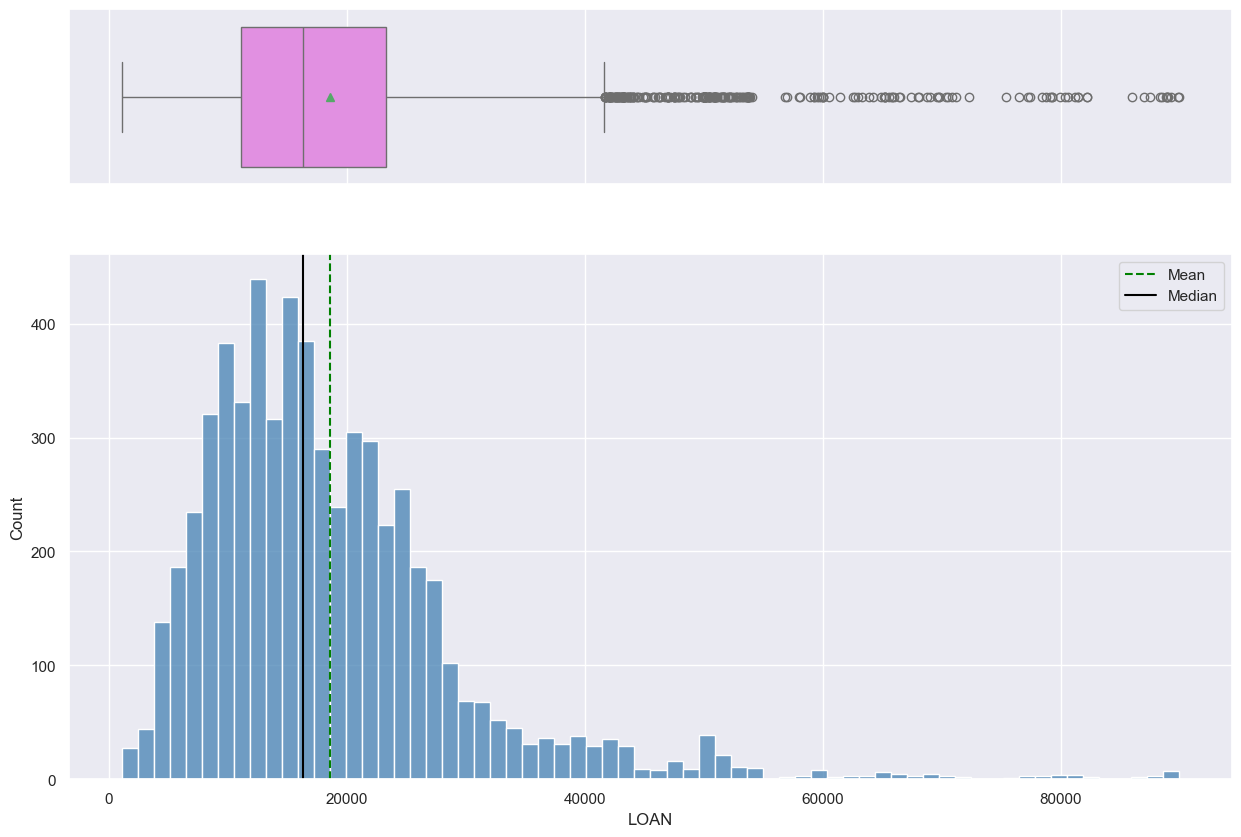

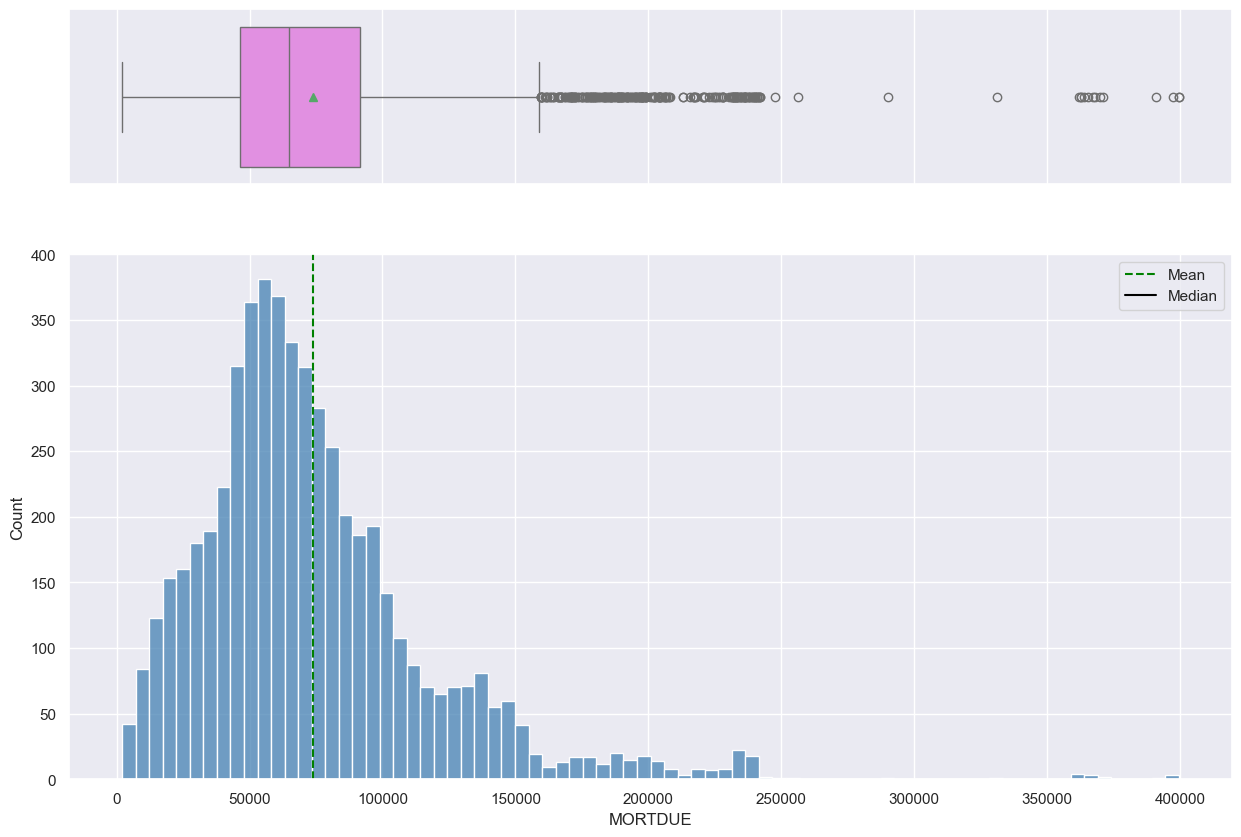

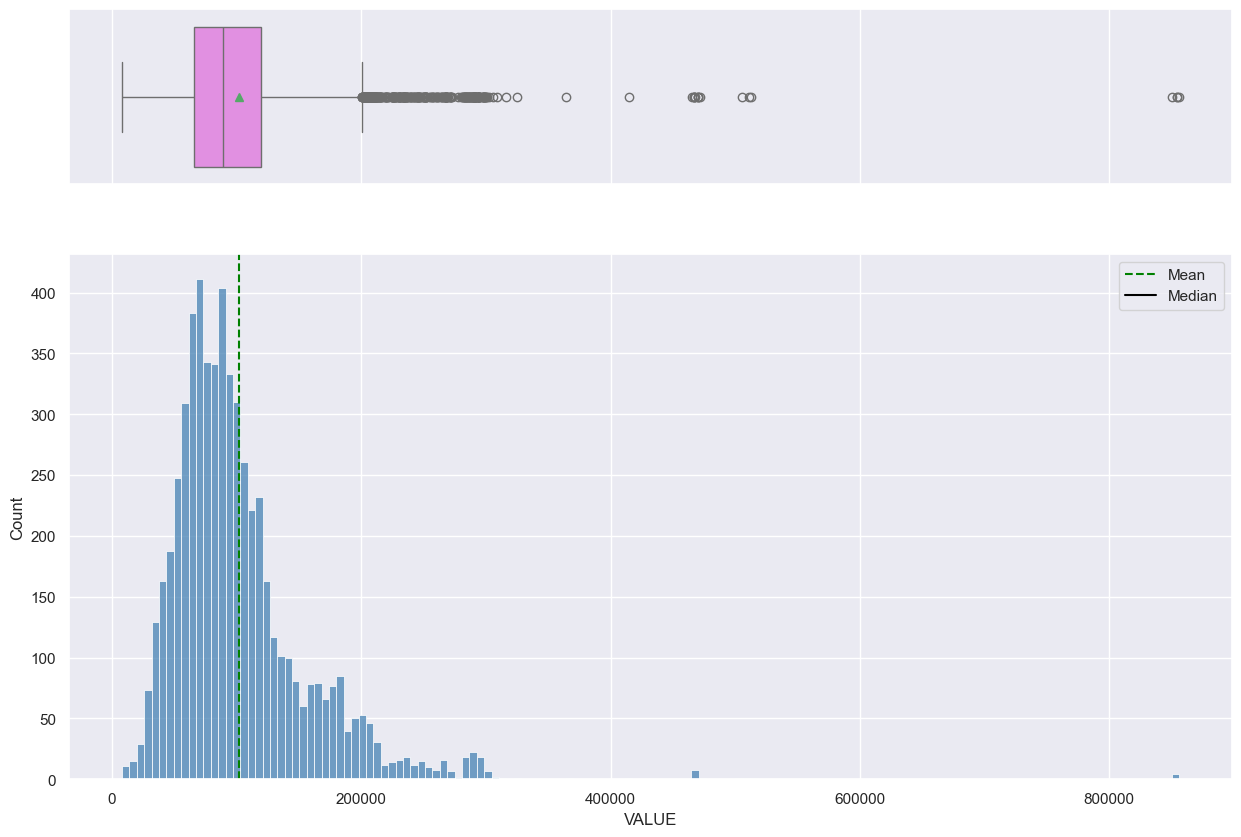

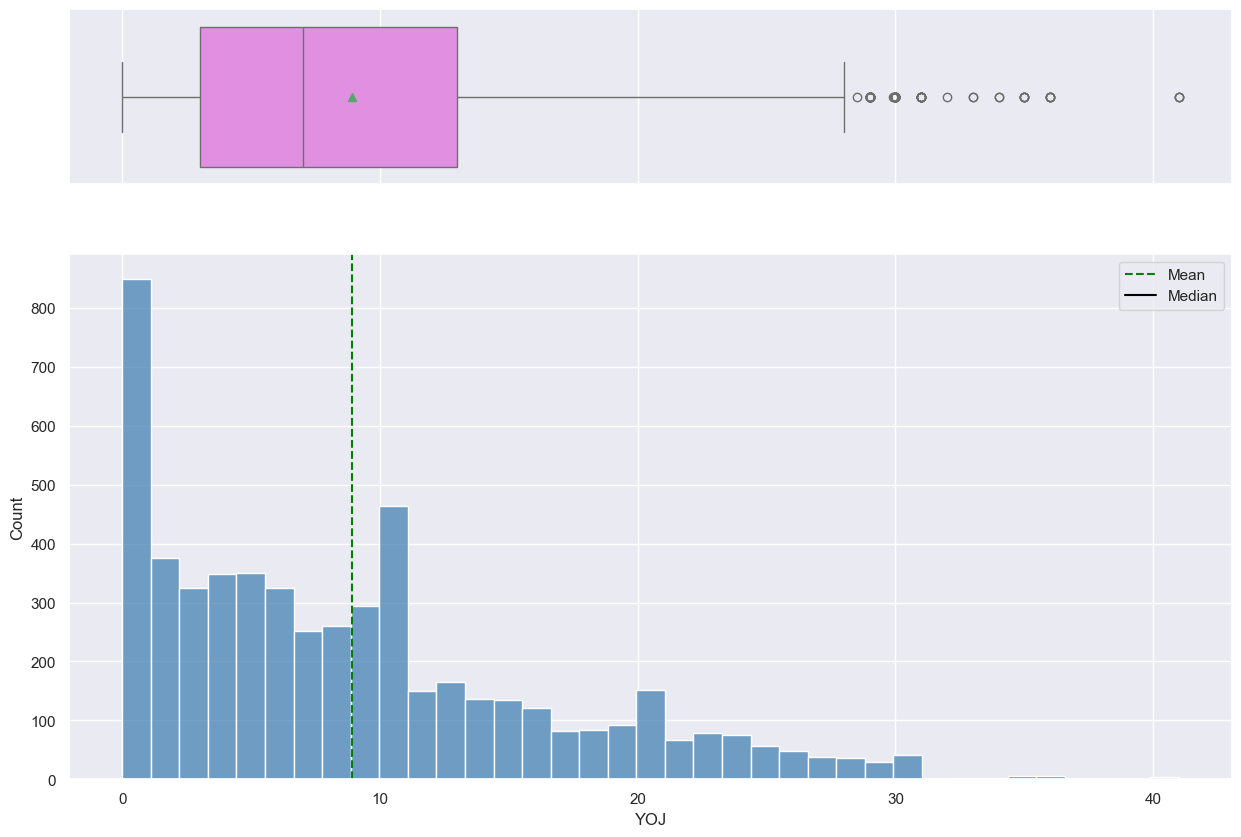

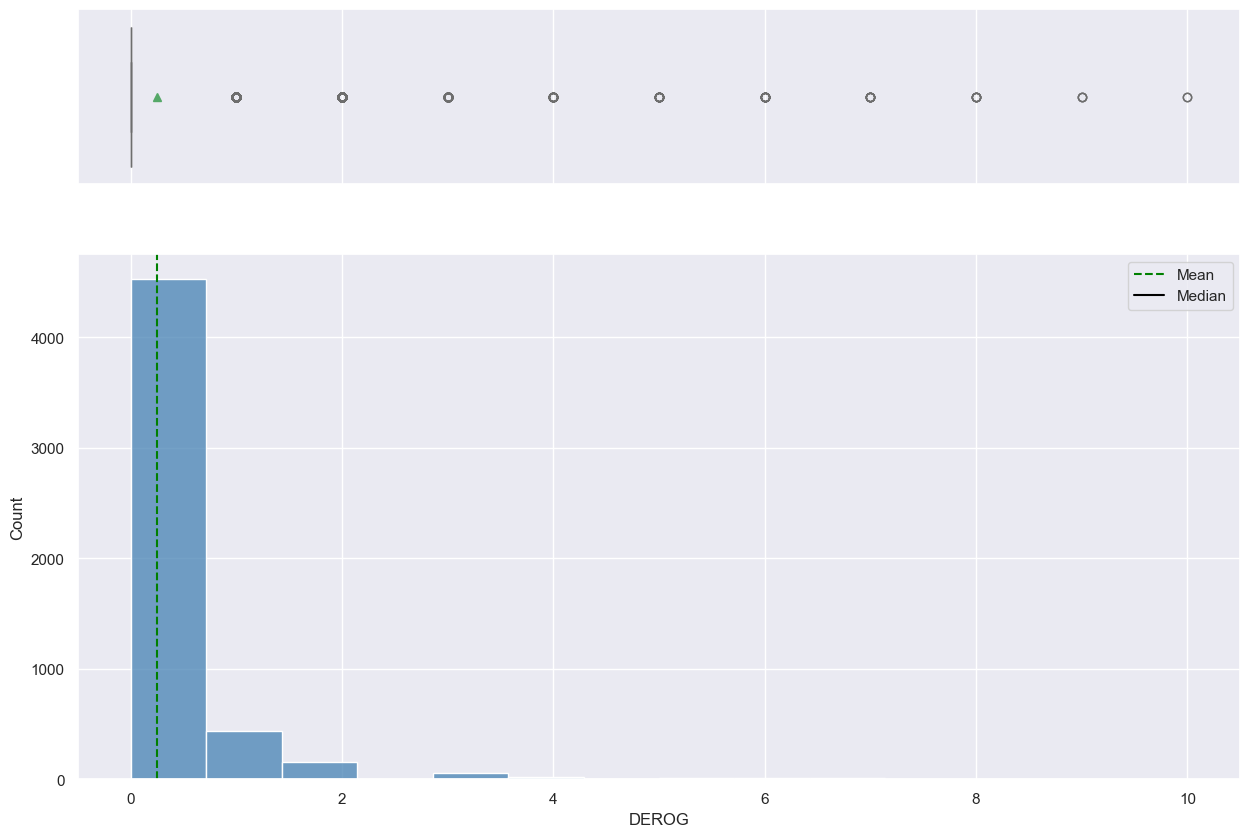

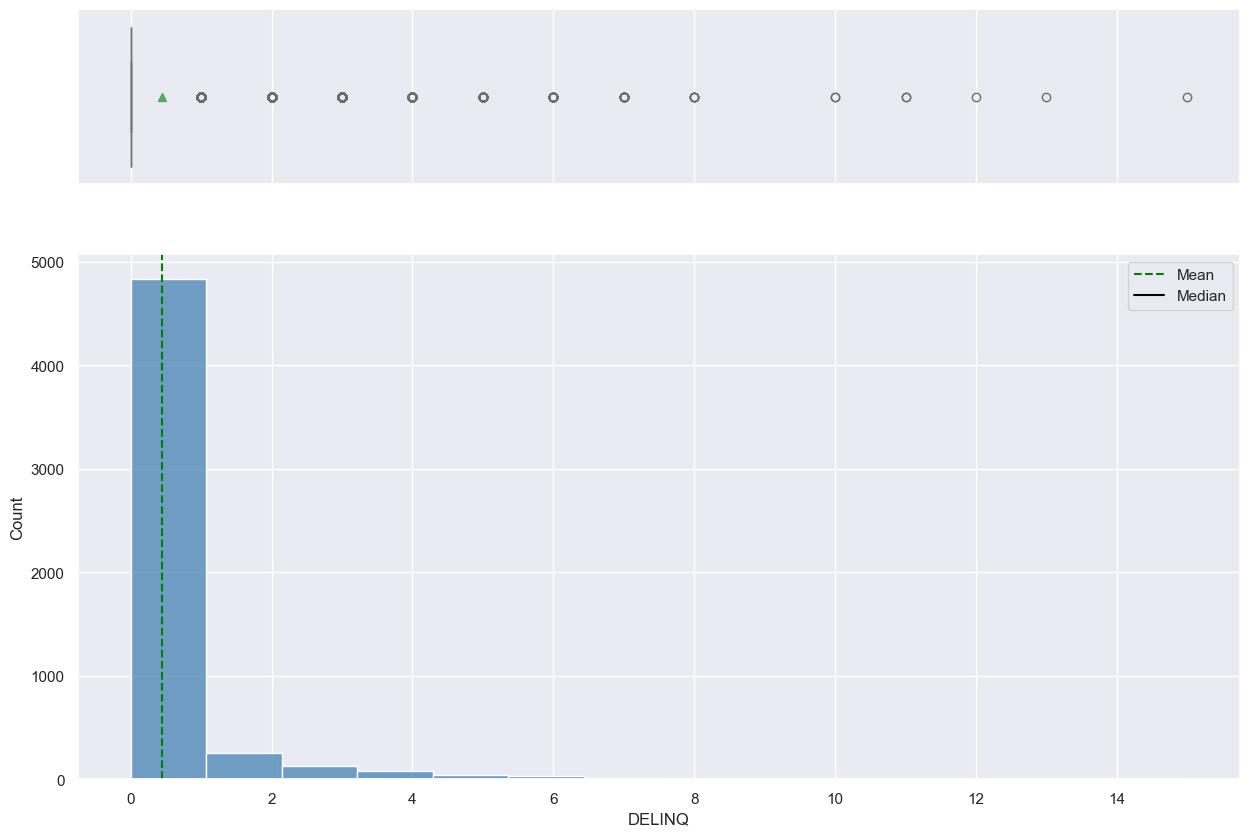

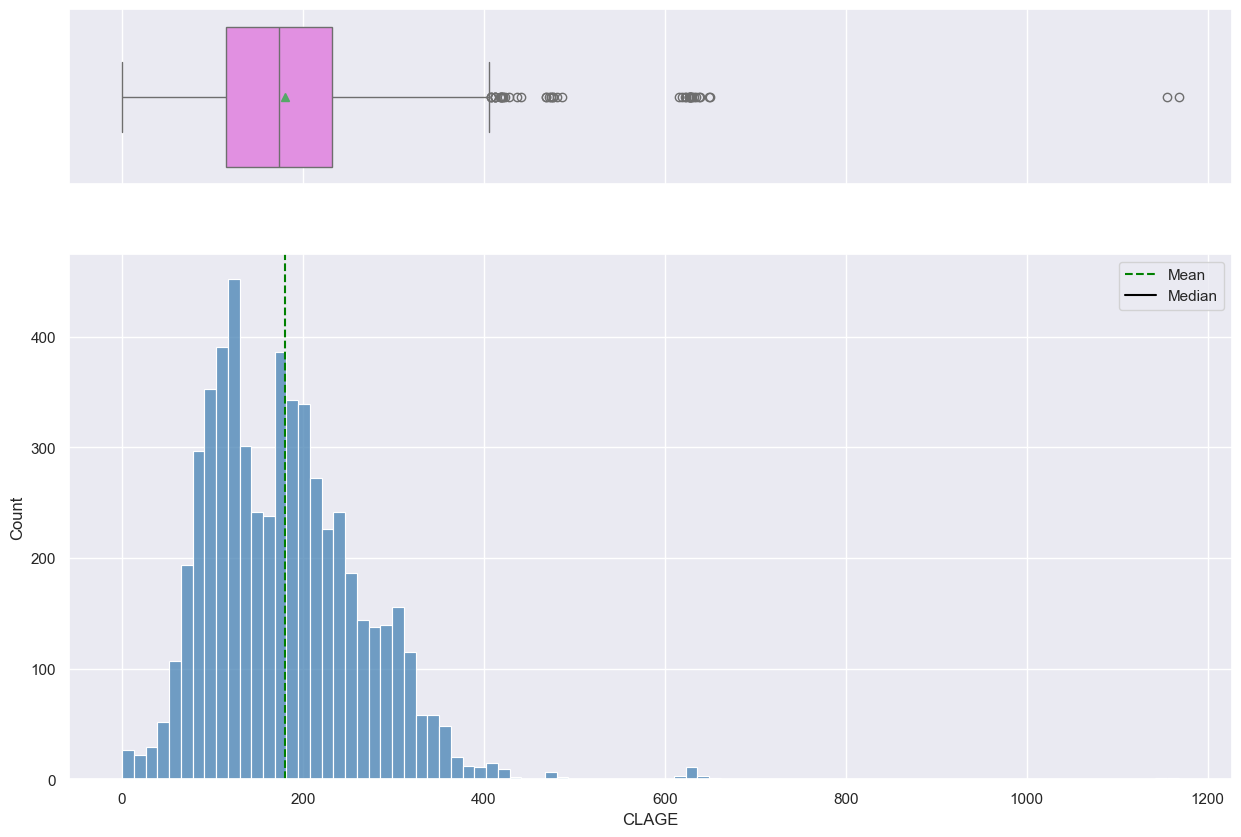

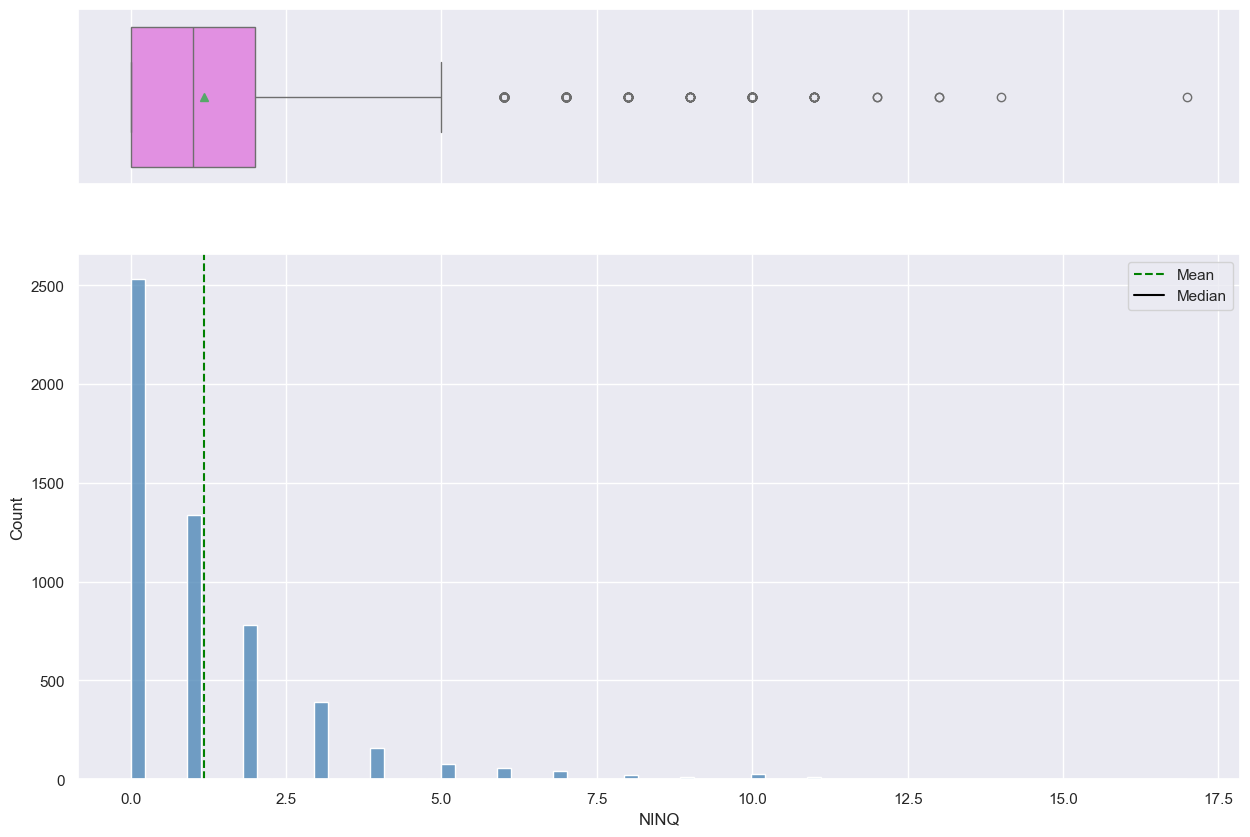

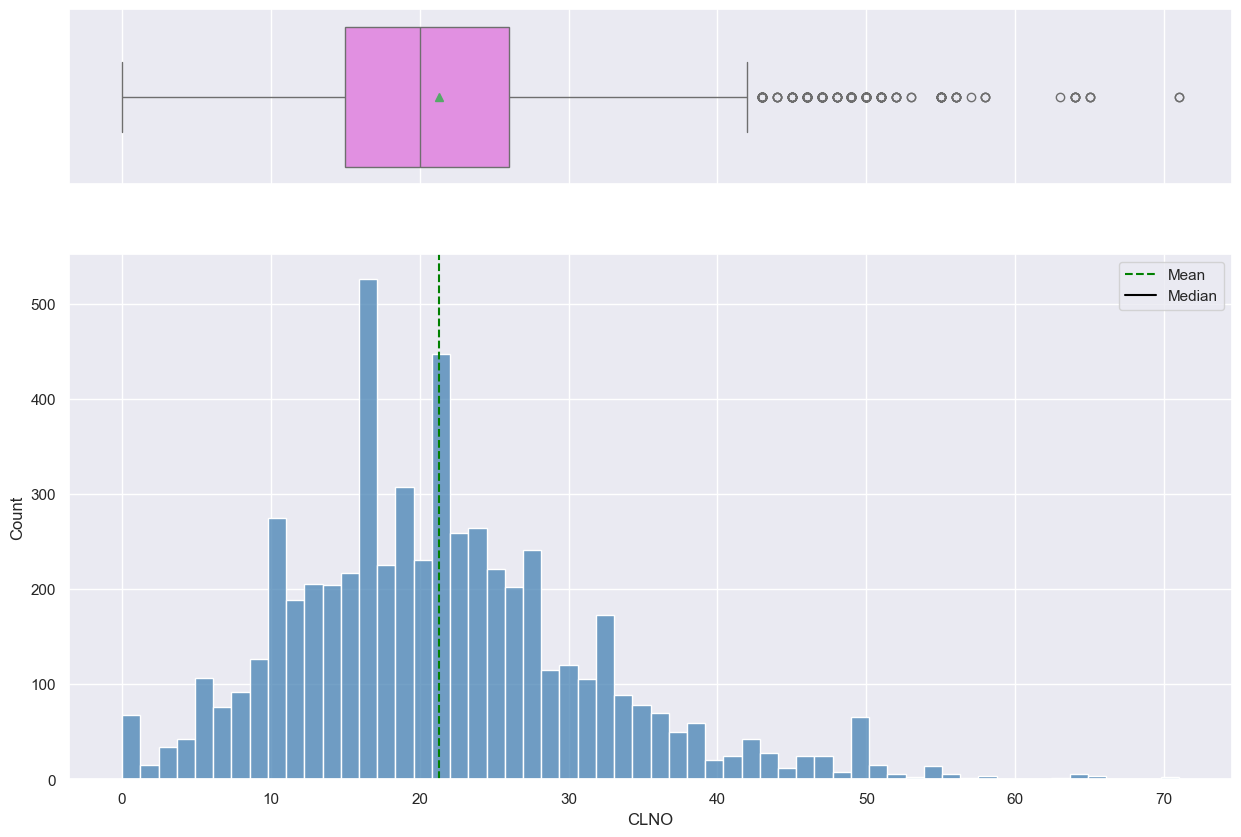

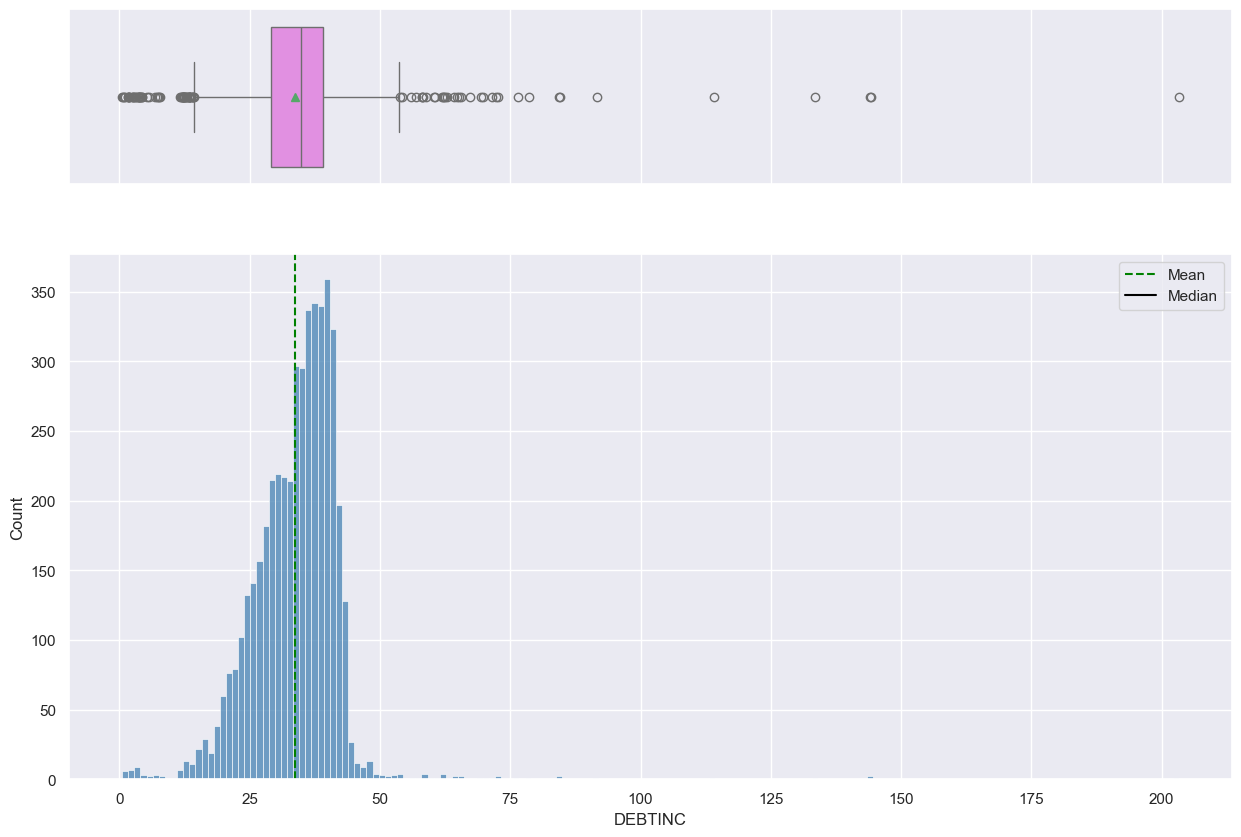

In [81]:
# Building the histogram boxplot 
for i in num_cols:
    histogram_boxplot(data[i])

**Insights**

- The variable LOAN has a skewed distribution to the right with lot of big outliers compared to the mean.
- The variable MORTDUE has a skewed distribution to the right with lot of big outliers compared to the mean.
- The variable VALUE is slightly skewed to the right with many oultiers.
- The variable YOG is very skewed to the right and has a few outliers.
- The variable DEROG and DELINQ are discrete and are skewed to the right with some outliers.
- The variable CLAGE seems to follow a distribution normally shaped with two modes.
- The variable NINQ is skewed to the right with some outliers.
- The variable CLNO follows a normal shape distribution slightly skewed to the right.
- The variable DEBTINC follows a normal shape distribution with outliers at both sides.

### **2. Univariate Analysis - Categorical Data**

In [82]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    total = len(feature)

    for p in plot.patches:
        # largeur de la barre = valeur du count
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)

        x = p.get_width() + 5
        y = p.get_y() + p.get_height() / 2

        plot.annotate(percentage, (x, y), va='center', size=12)


#### Analyze Barplots

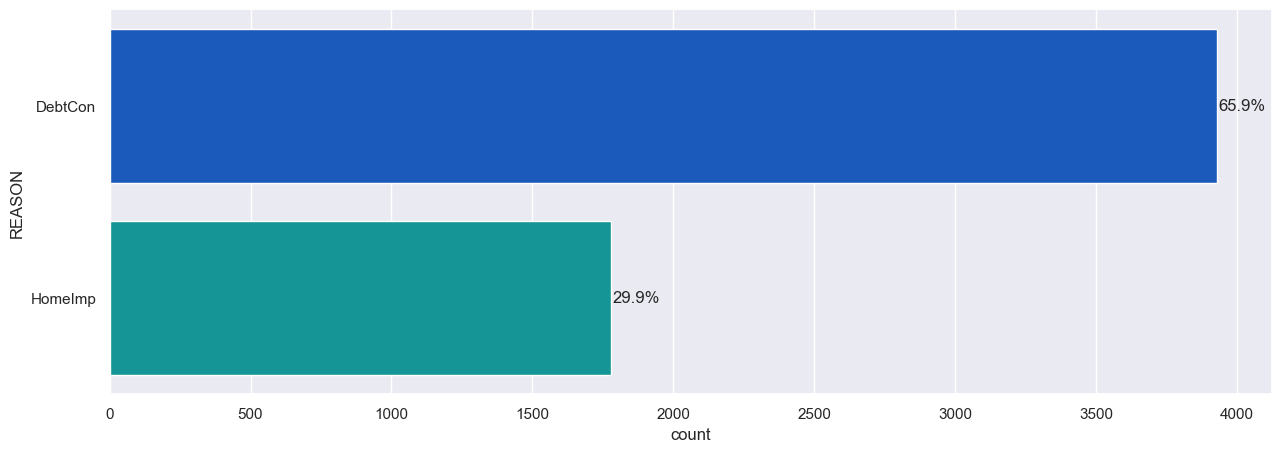

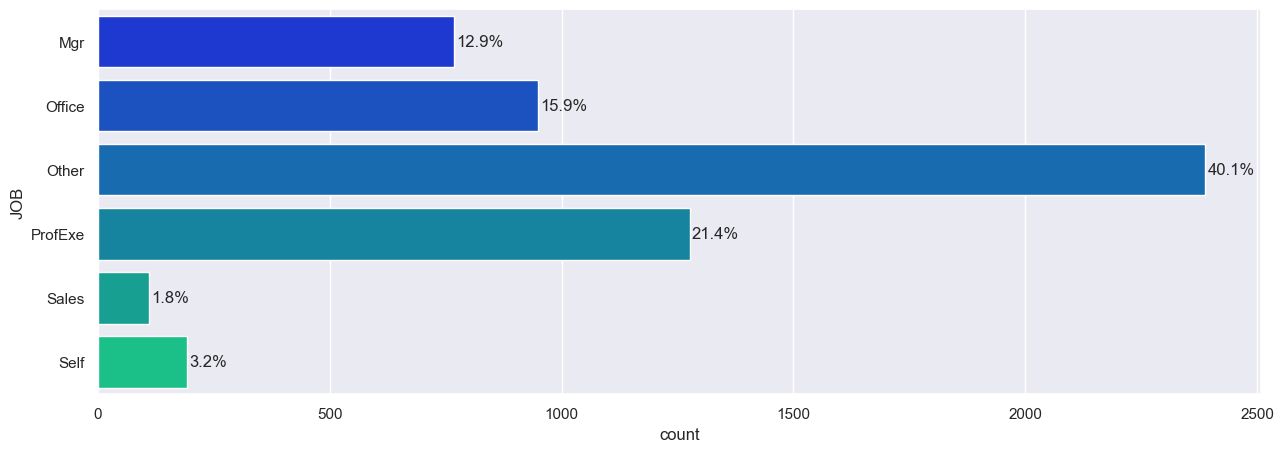

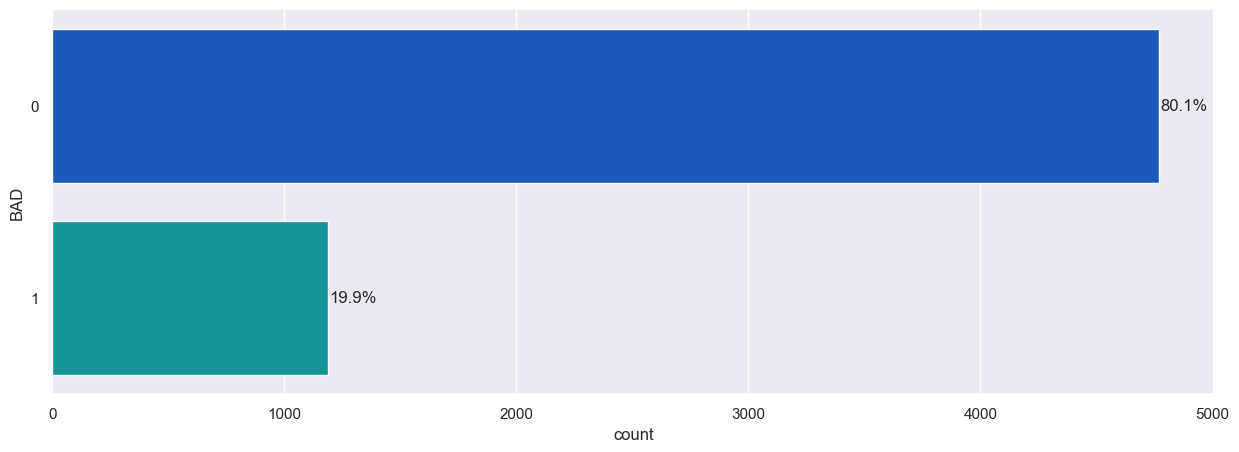

In [83]:

for i in cols:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(y=data[i], palette='winter')
    perc_on_bar(ax, data[i])
    plt.show()

**Insights**

- DELINQ isn't a categorical variable.
- The variable JOB seems to follow a normal distribution.
- The other two variables REASON and BAD are just 80-20 and 70-30 respectively.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='DEBTINC'>

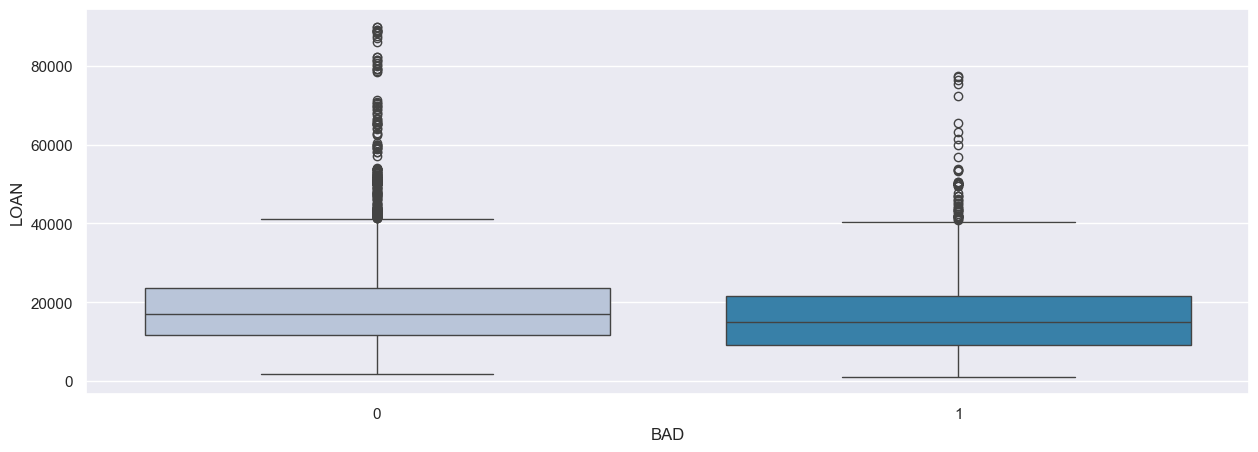

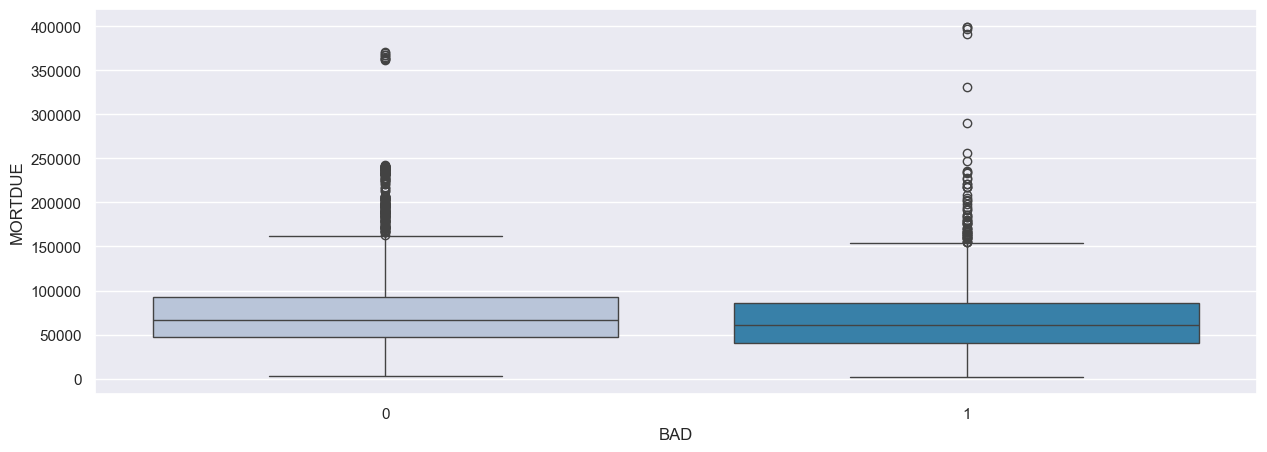

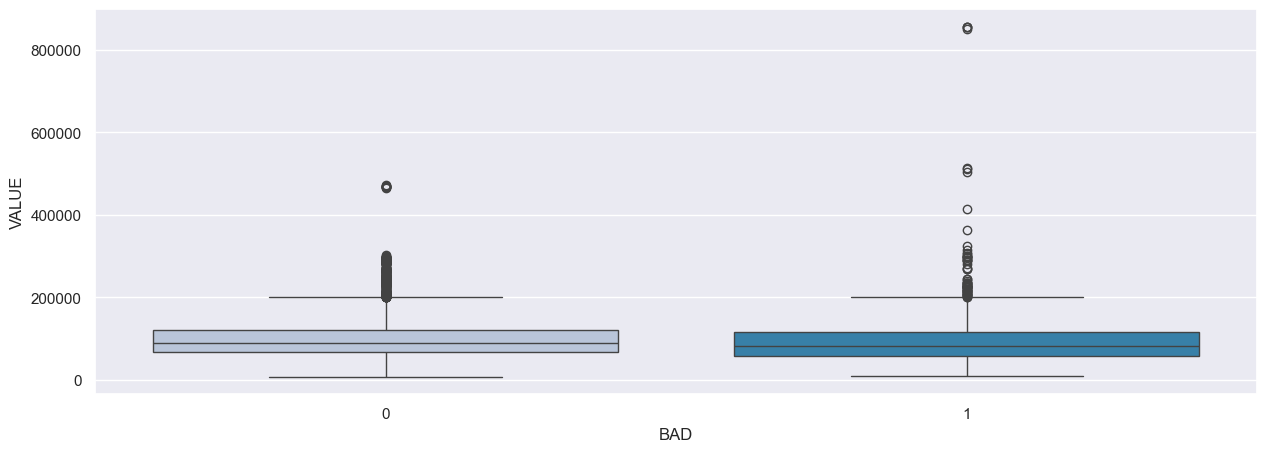

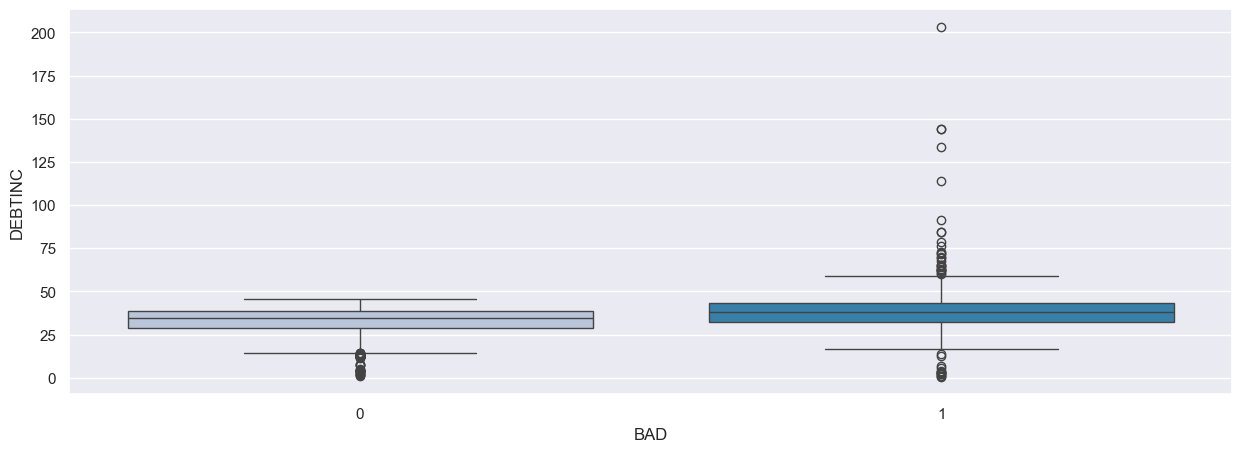

In [84]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="BAD", y="LOAN", palette="PuBu")

plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="BAD", y="MORTDUE", palette="PuBu")

plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="BAD", y="VALUE", palette="PuBu")

plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="BAD", y="DEBTINC", palette="PuBu")


**Insights**

- BAD vs LOAN: it seems that independently of the type of client (defaulted or not) they receive the same amount of loans.
- BAD vs MORTDUE: it seems that independently of the type of client (defaulted or not) they have the same amount due on the existing mortgage.
- BAD vs VALUE: it seems that independently of the type of client (defaulted or not) there is no difference in the current value of the property.
- BAD vs DEBTINC: both type of clients seems to have very similar ratio.

### **Bivariate Analysis: Two Continuous Variables**

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

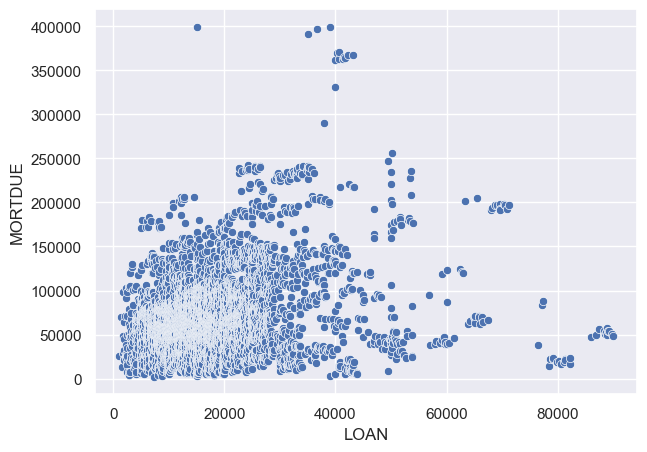

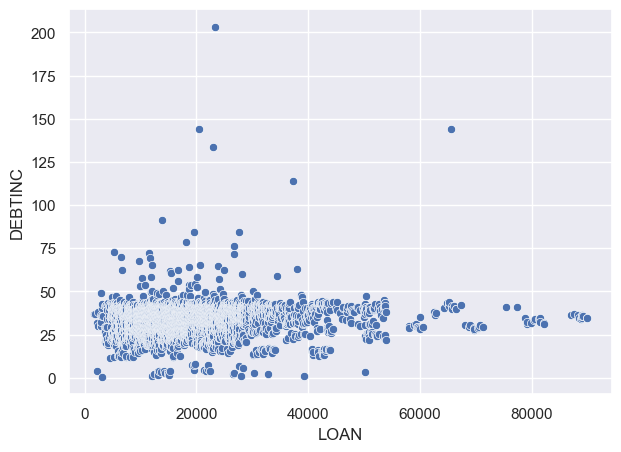

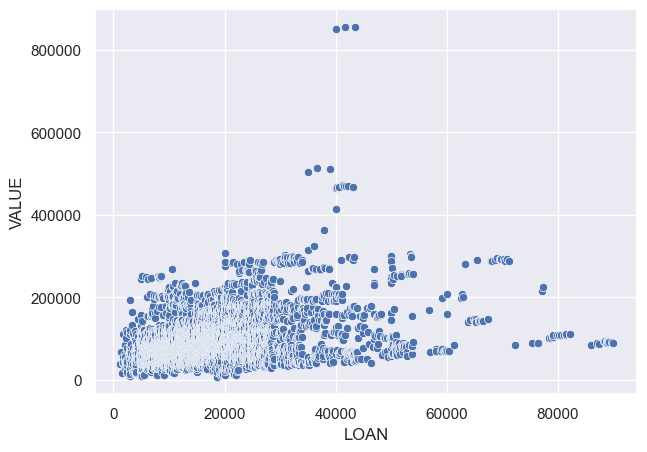

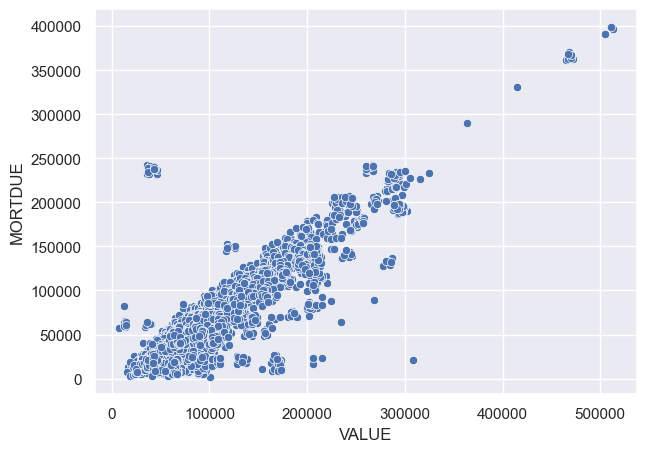

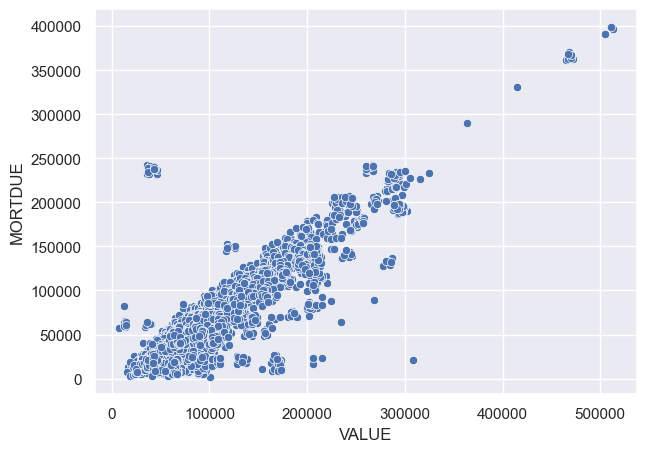

In [85]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="LOAN",y='MORTDUE',palette="PuBu")
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="LOAN",y='DEBTINC',palette="PuBu")
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="LOAN",y='VALUE',palette="PuBu")
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="VALUE",y='MORTDUE',palette="PuBu")
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="VALUE",y='MORTDUE',palette="PuBu")

**Insights:**

- There is a linear correlation between the variables VALUE and MORTDUE.
- There is no linear correlation between any other pair of variables.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart** 

In [86]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


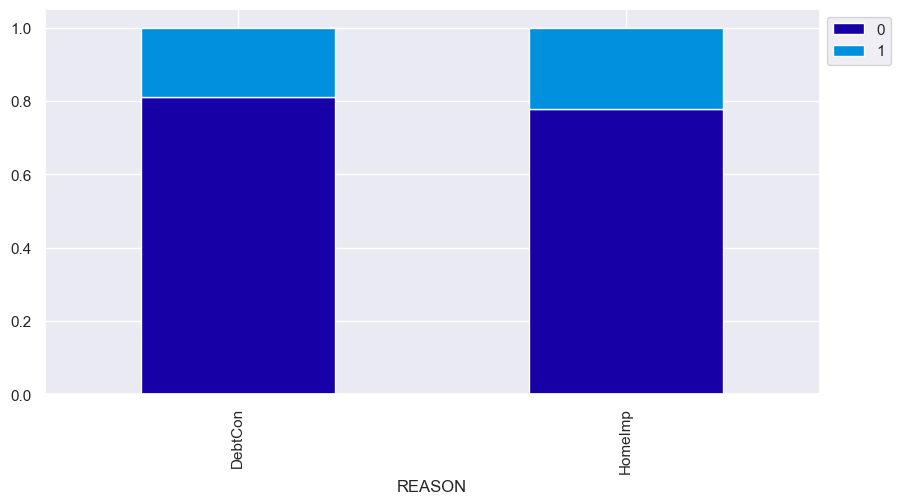

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


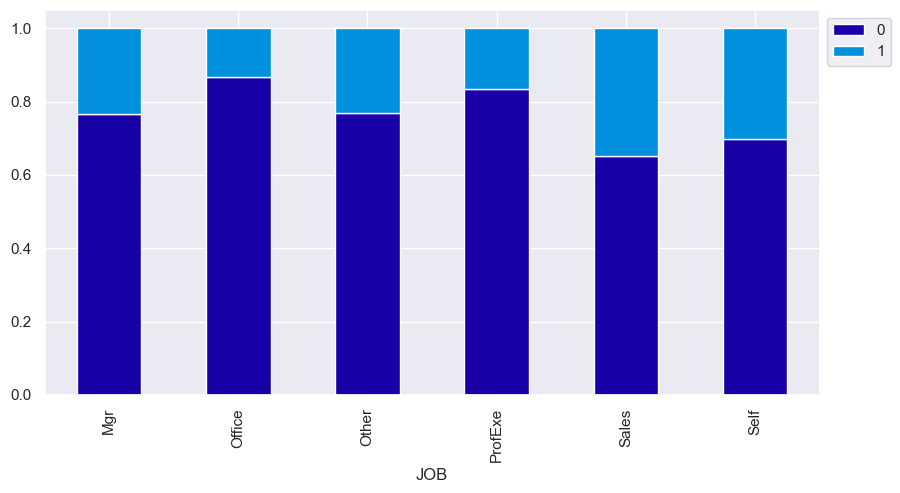

In [87]:
# Plotting stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])
stacked_plot(data['JOB'])

**Insights**

- In the first chart we can see that independently of the loan's reason 80% are non defaulted and 20% are defaulted clients.
- In the second chart we can see that people in sales has the highest percentage of defaulted loans.
- Office employees and professional executive are the two kind of jobs with the lowest rate of defaulted loans.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

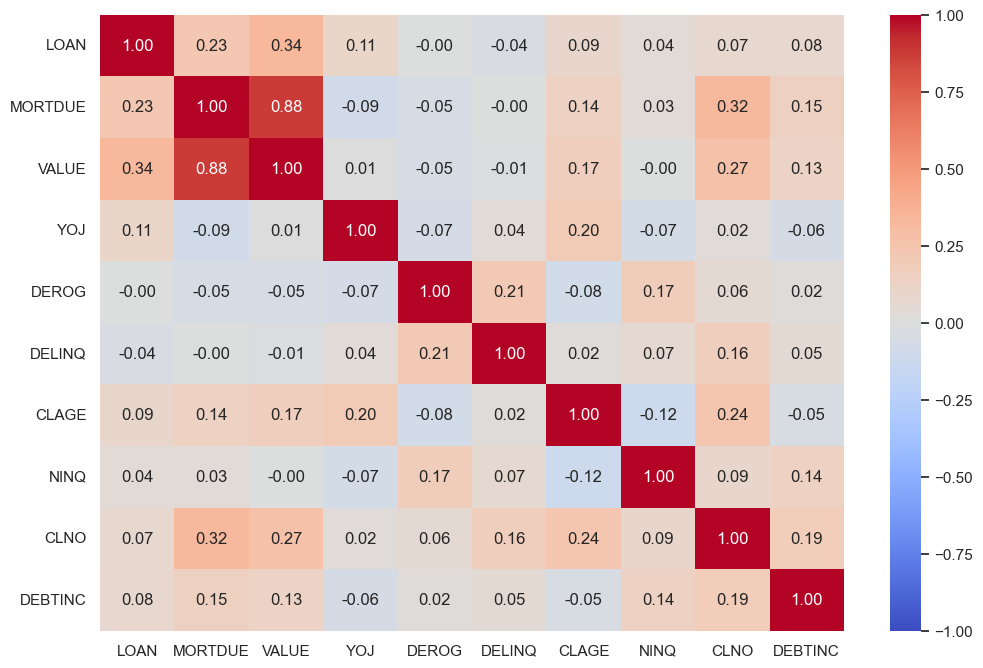

In [88]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

#### Treating Outliers

In [89]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(q = .25) # 25th quantile
    Q3=df[col].quantile(q = .75)  # 75th quantile
    IQR = Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [90]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [91]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


#### Adding new columns in the dataset for each column which has missing values 

In [92]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [93]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [94]:
#  Treating Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
# Séparer les colonnes numériques et catégorielles
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Remplir les colonnes numériques avec la médiane
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Remplir les colonnes catégorielles avec le mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [95]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [96]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


In [97]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False
5959,0,41600,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,...,False,False,False,False,False,False,False,False,False,False


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

### **Droping missing value flags**

In [99]:
#creating a list of bool features
bool_cols = df.select_dtypes(['bool']).columns.tolist()

#droping missing value flags
X = df.drop(columns = bool_cols)

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [101]:
X.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


## **Data Preparation**

### **Separating the target variable from other variables**

In [102]:
# Separating the target variable and other variables
Y = df.BAD
X = df.drop(columns = ['BAD'])

# Creating dummy variables for the categorical variables

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)      

### **Scaling the data**

In this case features have different scales, so we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

In [103]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Splitting the data into 70% train and 30% test set**

The data is unbalanced (~80% is non defaulted and ~20% is defaulted). For this reason, we will use **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold. 

In [104]:
# Splitting the data into training and test set

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

## **Training models**


In [105]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Building a Logistic Regression Model** 

- Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

In [106]:
# Defining the Logistic regression model
lg = LogisticRegression()

# Fitting the model on the training data 
lg.fit(x_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3340
           1       0.71      0.61      0.65       832

    accuracy                           0.87      4172
   macro avg       0.81      0.77      0.79      4172
weighted avg       0.87      0.87      0.87      4172



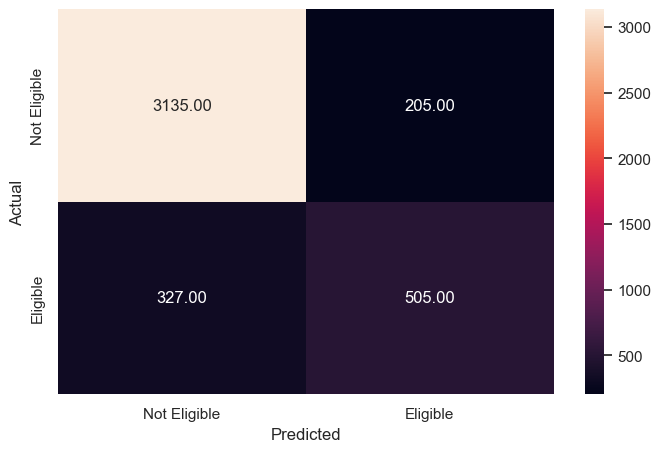

In [107]:
#Predicting for train set
y_pred_train = lg.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1431
           1       0.75      0.59      0.66       357

    accuracy                           0.88      1788
   macro avg       0.82      0.77      0.79      1788
weighted avg       0.87      0.88      0.87      1788



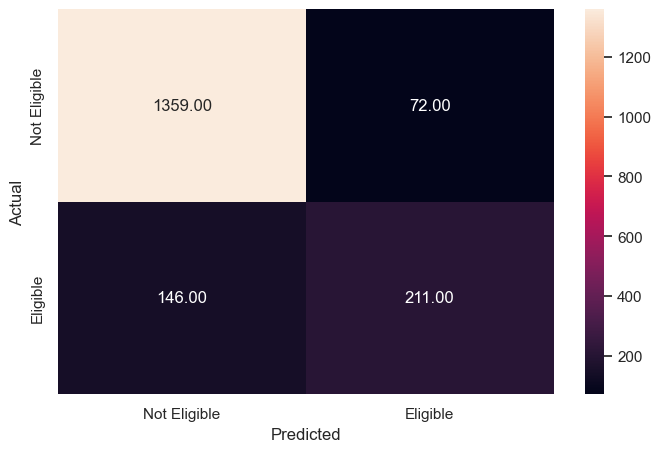

In [108]:
#Predicting for test set
y_pred_test = lg.predict(x_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

**Observations:**

- **We are getting an accuracy of about 80%** on the train and the test datasets.
- However, **the recall for this model is only around 9% for class 1 on the train data and 8% on the test data.**
- As the recall is low, **this model will not perform well** in differentiating out clients who have a high chance of defaulting the loan, meaning it will eventually not help in increasing the bank income. 
- As we can see from the Confusion Matrix, **this model is not good at identifying clients who are at risk of defaulting.**

### **Build a Decision Tree Model**

**Observation: We aren't going to treat de outliers** in order to build the model because small changes in the training data can result in a large change in the tree and consequently the final predictions.

#### Data Preparation for the tree based model

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [110]:
#copying df to another variable
data = df.copy()

#### Separating the target variable y and independent variable x

In [111]:
# Separating the target variable and other variables
Y = data.BAD
X = data.drop(columns = ['BAD'])

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True) 

In [112]:
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,...,False,False,False,True,True,False,True,False,False,False
1,1300,70053.0,68400.0,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262,...,False,False,False,True,True,False,True,False,False,False
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,...,False,False,False,True,True,False,True,False,False,False
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,...,True,True,True,True,False,False,True,False,False,False
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,...,False,False,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,41600,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,...,False,False,False,False,False,False,True,False,False,False
5956,41600,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,...,False,False,False,False,False,False,True,False,False,False
5957,41600,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,...,False,False,False,False,False,False,True,False,False,False
5958,41600,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,...,False,False,False,False,False,False,True,False,False,False


#### Split the data

In [113]:
# Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [114]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [115]:
#fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



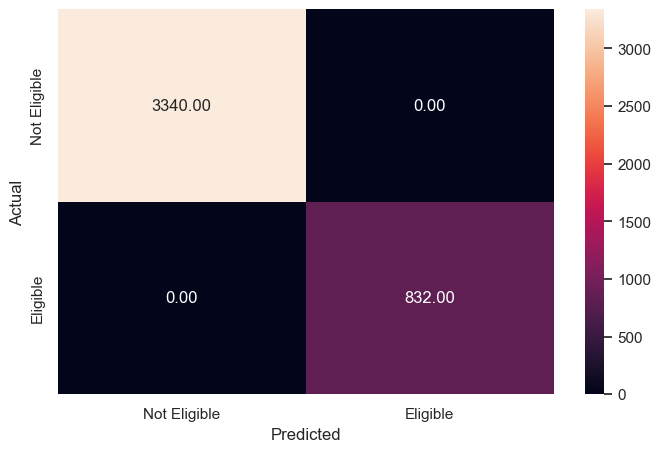

In [116]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1431
           1       0.66      0.59      0.62       357

    accuracy                           0.86      1788
   macro avg       0.78      0.76      0.77      1788
weighted avg       0.85      0.86      0.85      1788



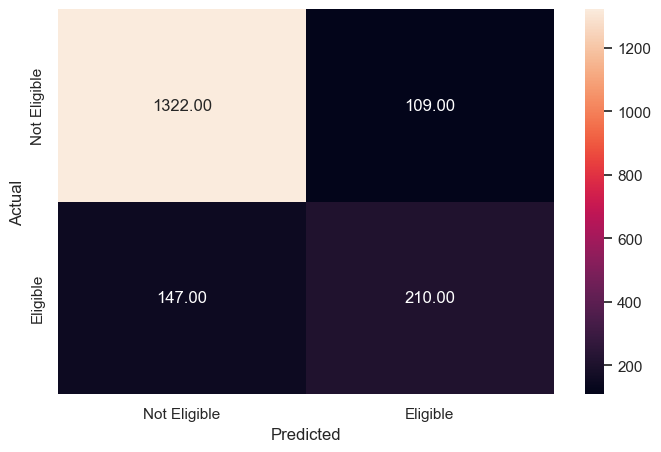

In [117]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Insights**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.62 in comparison to 1.00 for the training dataset, i.e., the Decision Tree is **overfitting the training data.**
- The precision on the test data suggests that there's a 27% (1 - 0.73) chance that the model will predict that a client is going to default even though he/she would not (false positive), increasing the risk for  **the bank to loses income.**
- The **recall** in this model is greater than in logistical regression: 0.62 vs. 0.41.

### **Decision Tree - Hyperparameter Tuning**

* We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**Let's plot the feature importance and check the most important features.**

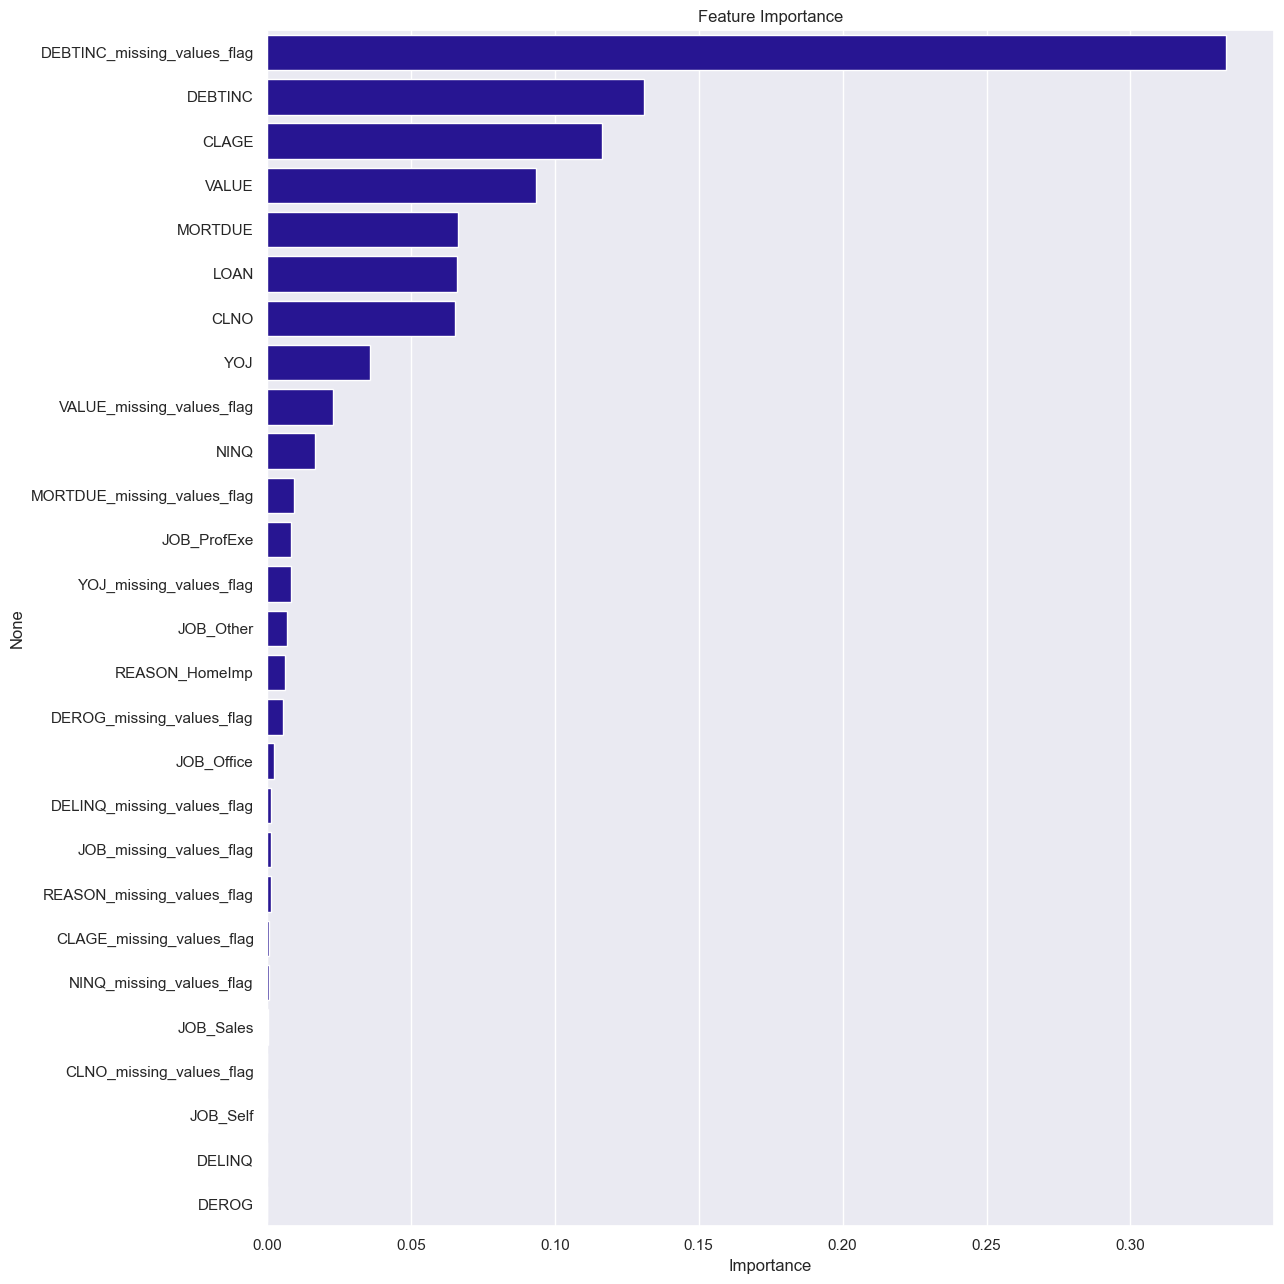

In [118]:
# VERSION FINALE CORRIGÉE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assure-toi que 'model' est ton arbre de décision entraîné
importances = dt.feature_importances_
columns = X.columns

importance_df = pd.DataFrame({
    'Importance': importances
}, index=columns).sort_values('Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)  # CORRIGÉ
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

- According to the Decision Tree, DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC, CLAGE and LOAN.
- This might signify that any client with no data in the DEBTINC ratio, will not receive any loan.
- The other important features are MORTDUE, VALUE.

#### Using GridSearchCV for Hyperparameter tuning on the model

In [119]:
# Choosing the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)


# Fitting the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)


# Setting the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_


# Fitting the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       min_samples_leaf=10, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3340
           1       0.62      0.80      0.70       832

    accuracy                           0.86      4172
   macro avg       0.78      0.84      0.80      4172
weighted avg       0.88      0.86      0.87      4172



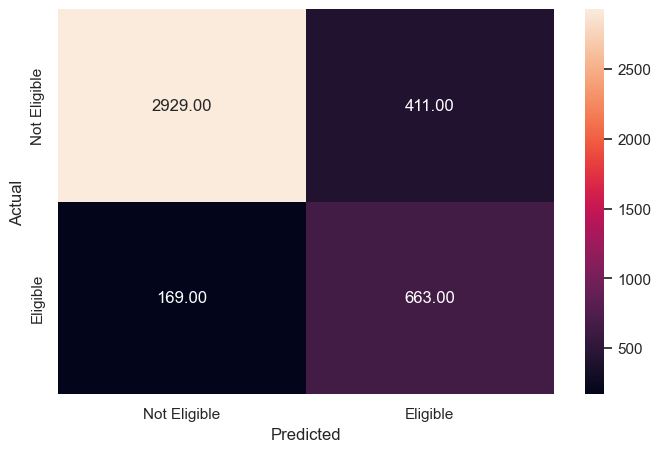

In [120]:
# Checking performance on the training data based on the tuned model

y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1431
           1       0.61      0.76      0.67       357

    accuracy                           0.85      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.85      0.86      1788



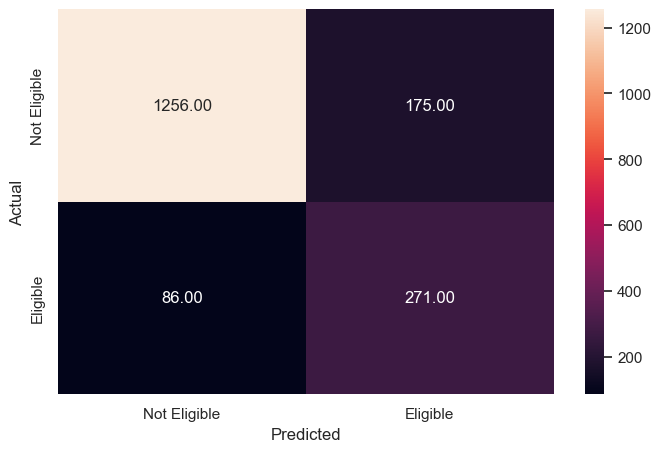

In [121]:
# Checking performance on the testing data based on the tuned model

y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)


**Insights**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly (1.00 to 0.74)** This makes sense because we are trying to reduce overfitting.
- The tuned model is performing well in comparison to the model with default values of hyperparameters: **Recall increases from 0.61 to 0.74** in test data.
- **This model is not overfitting** the training data and giving approximately the same result on the test and train datasets.
- **Precision has gone down significantly from .73 to .62** in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the client is going to default even if he/she won't, and this will increases the risk of losing income.


#### Plotting the Decision Tree

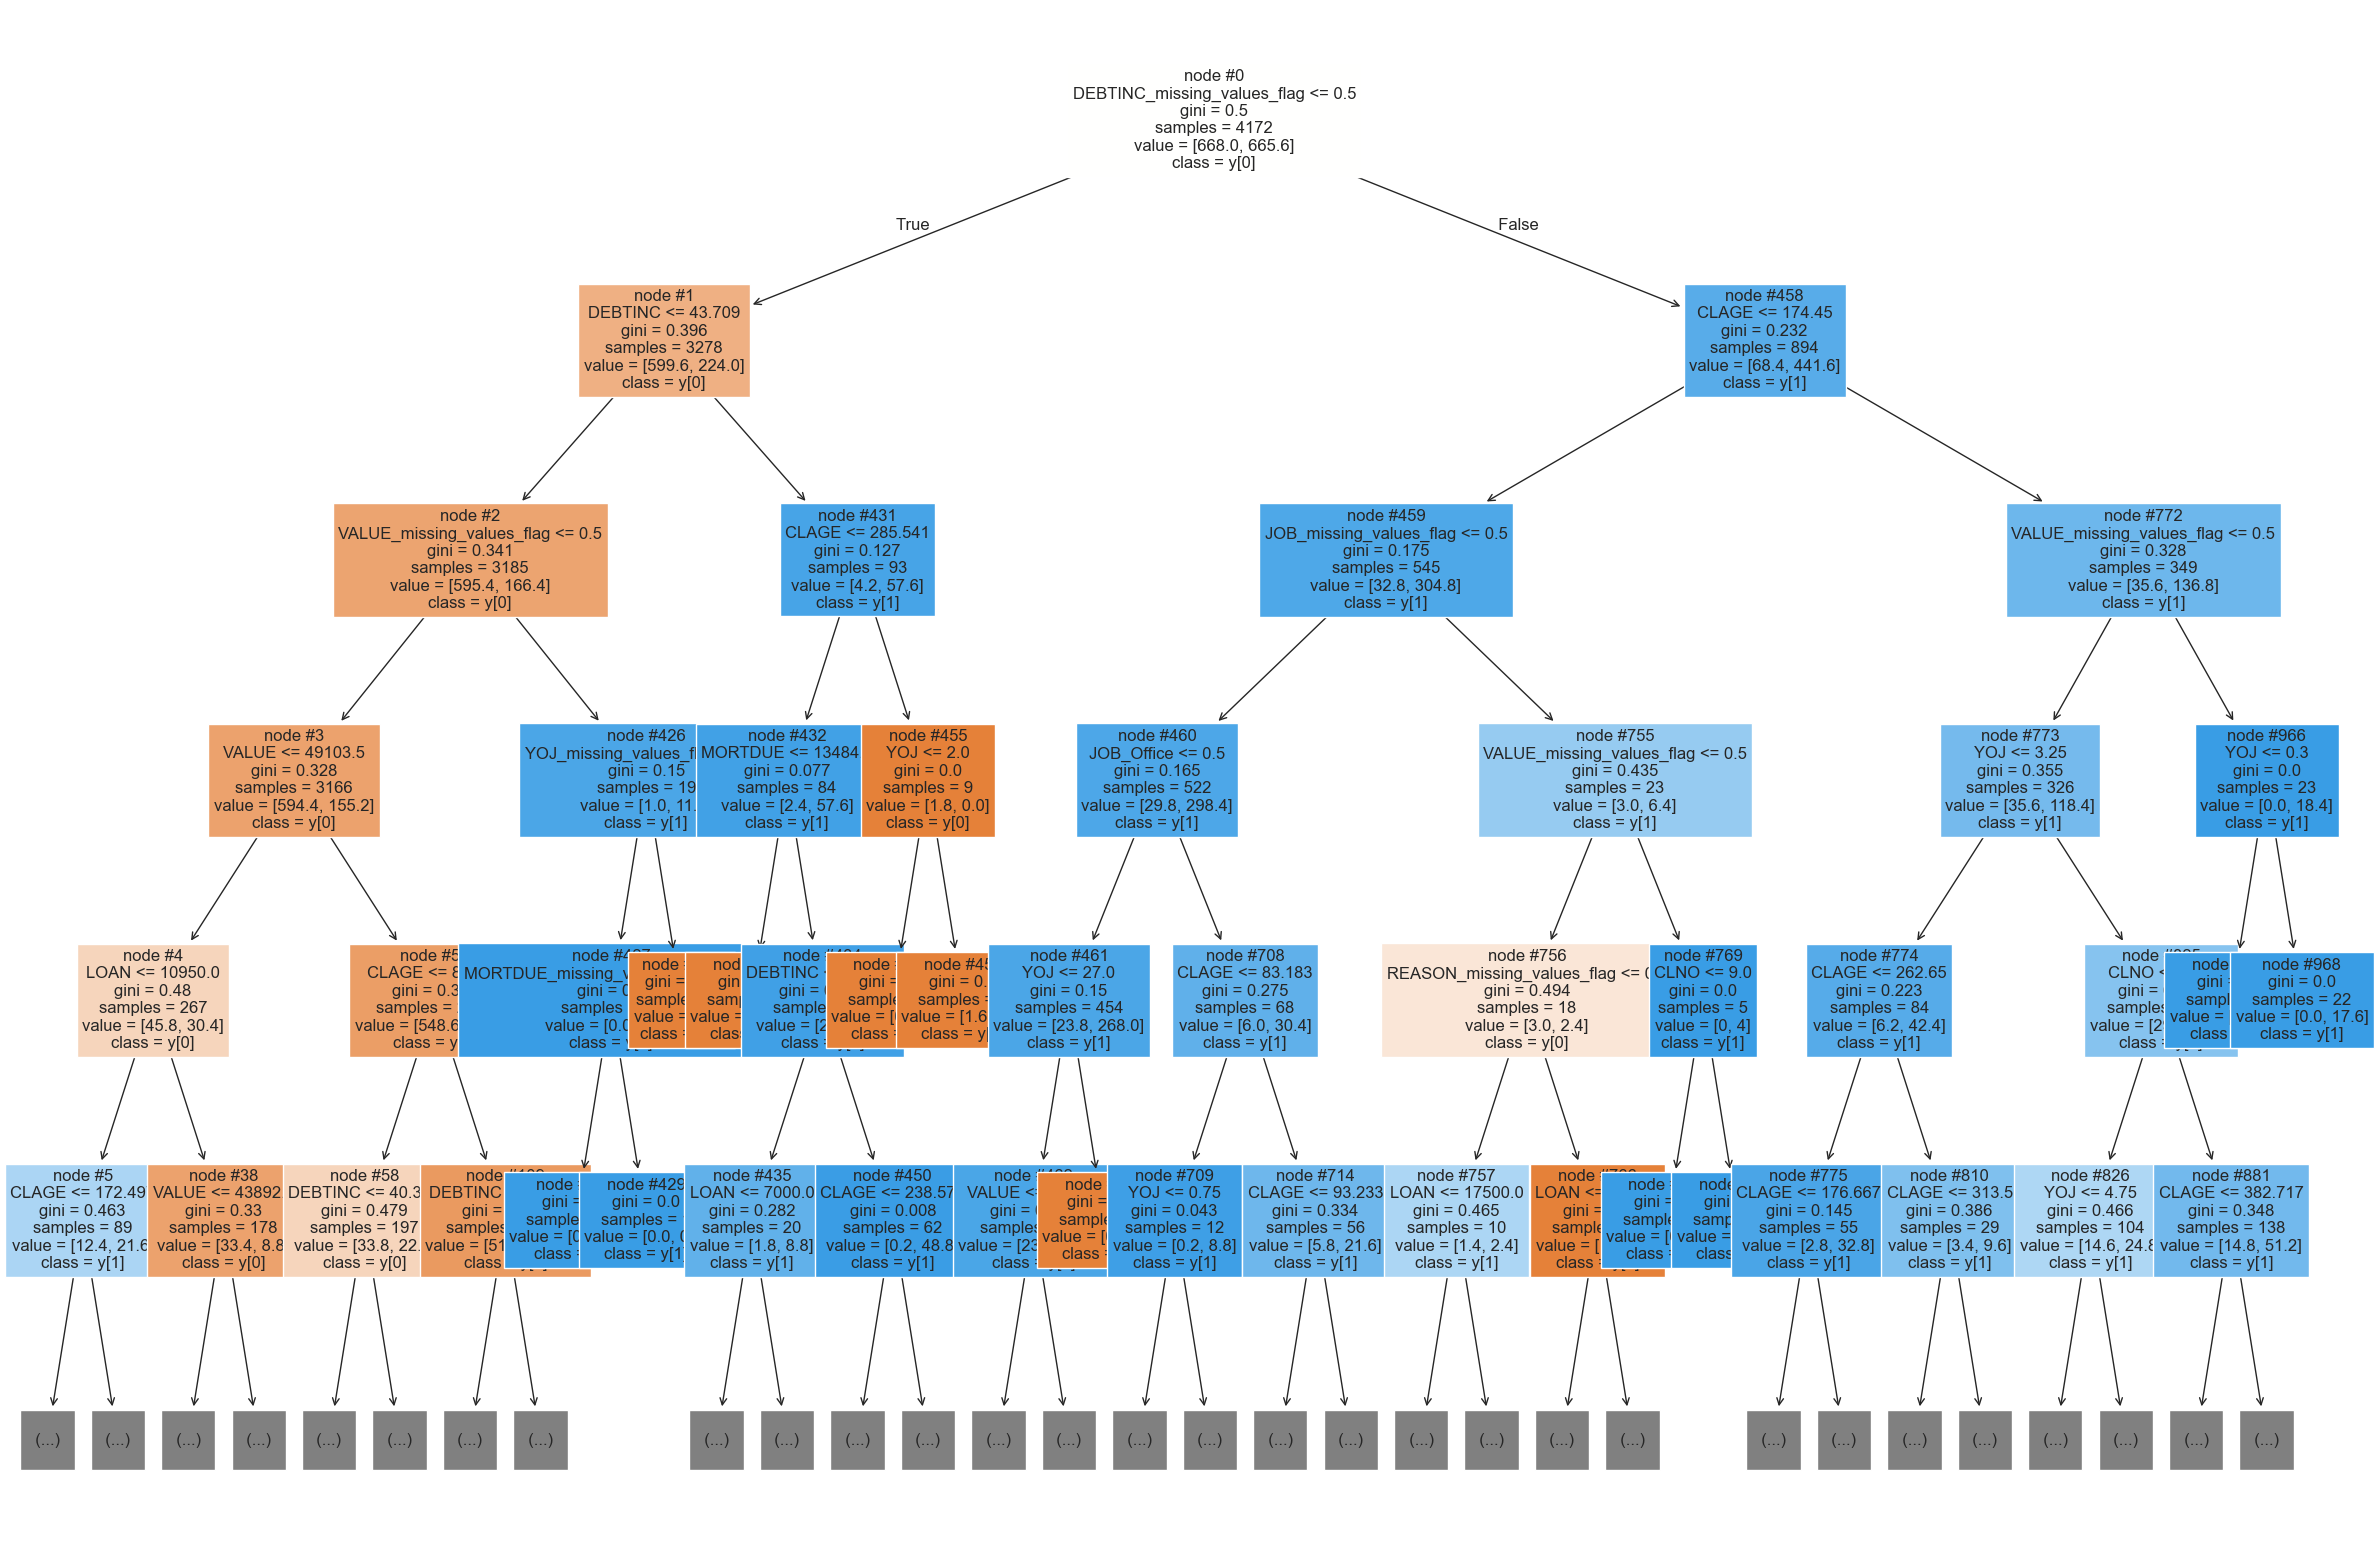

In [122]:
# Plotting the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Building a Random Forest Classifier**


In [123]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



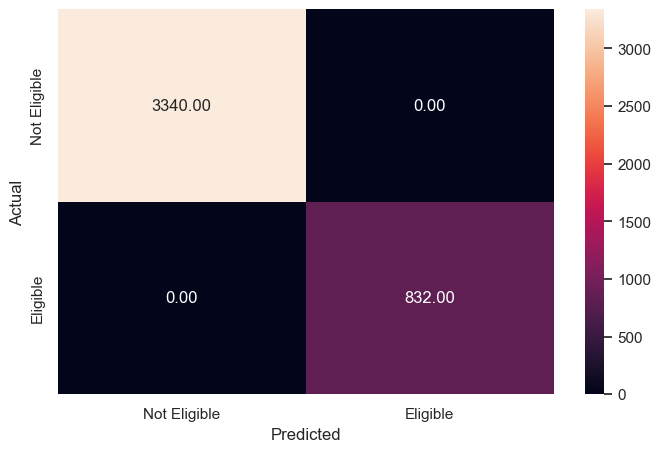

In [124]:
#Checking performance on the training data

y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1431
           1       0.79      0.68      0.73       357

    accuracy                           0.90      1788
   macro avg       0.85      0.82      0.83      1788
weighted avg       0.90      0.90      0.90      1788



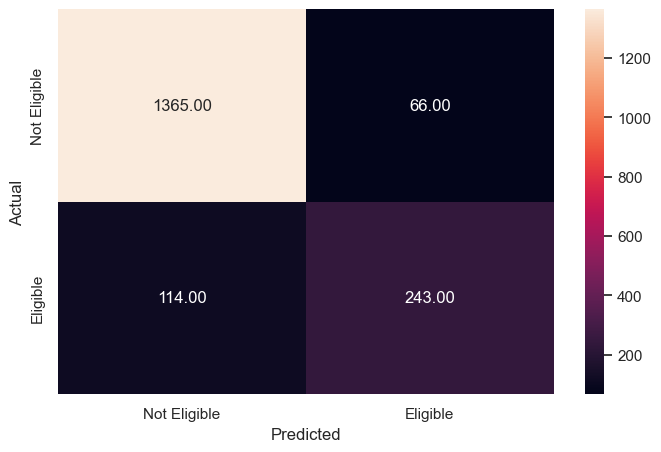

In [125]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the **recall** on the test data is only **0.68 for class 1 (lower than the tuned Decision Tree).**
- Precision is high for the test data as well. 

### **Build a Random Forest model with Class Weights**

In [126]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



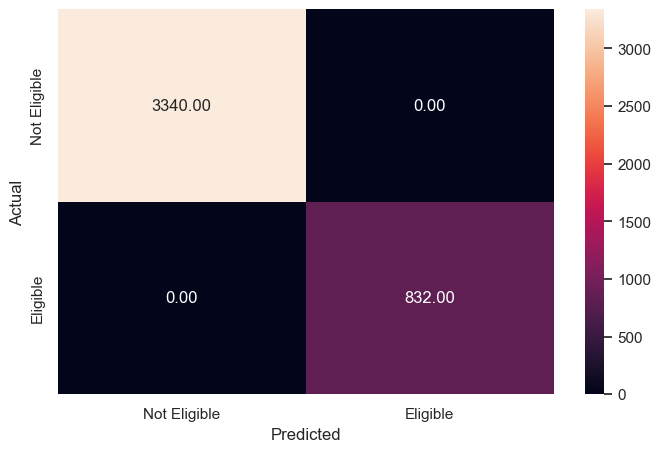

In [127]:
# Checking performance on the train data

y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1431
           1       0.77      0.63      0.69       357

    accuracy                           0.89      1788
   macro avg       0.84      0.79      0.81      1788
weighted avg       0.88      0.89      0.88      1788



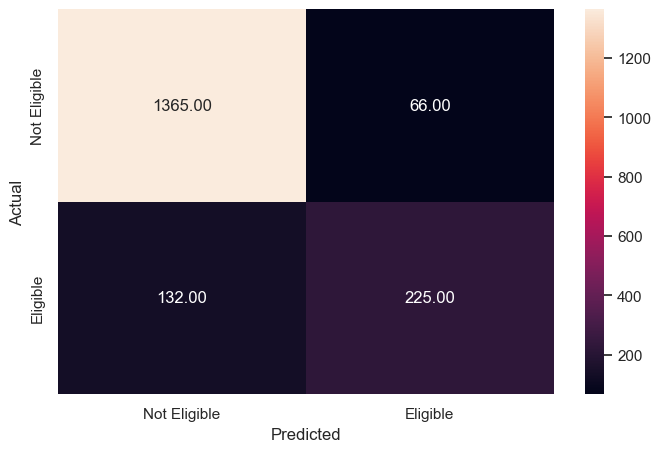

In [128]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations**

- The random forest classifier is still **overfitting** in the training data. 
- **Recall** decreased from **.68 to .63**. 
- Precision is still high for the test data as well.
- Using class_weight={0: 0.2, 1: 0.8} got worse results. When we increase class weight for class 0, recall improves a little bit, for instance: class_weight={0: 0.5, 1: 0.5} which is the default classifier we obtained a higher recall 0.68. 

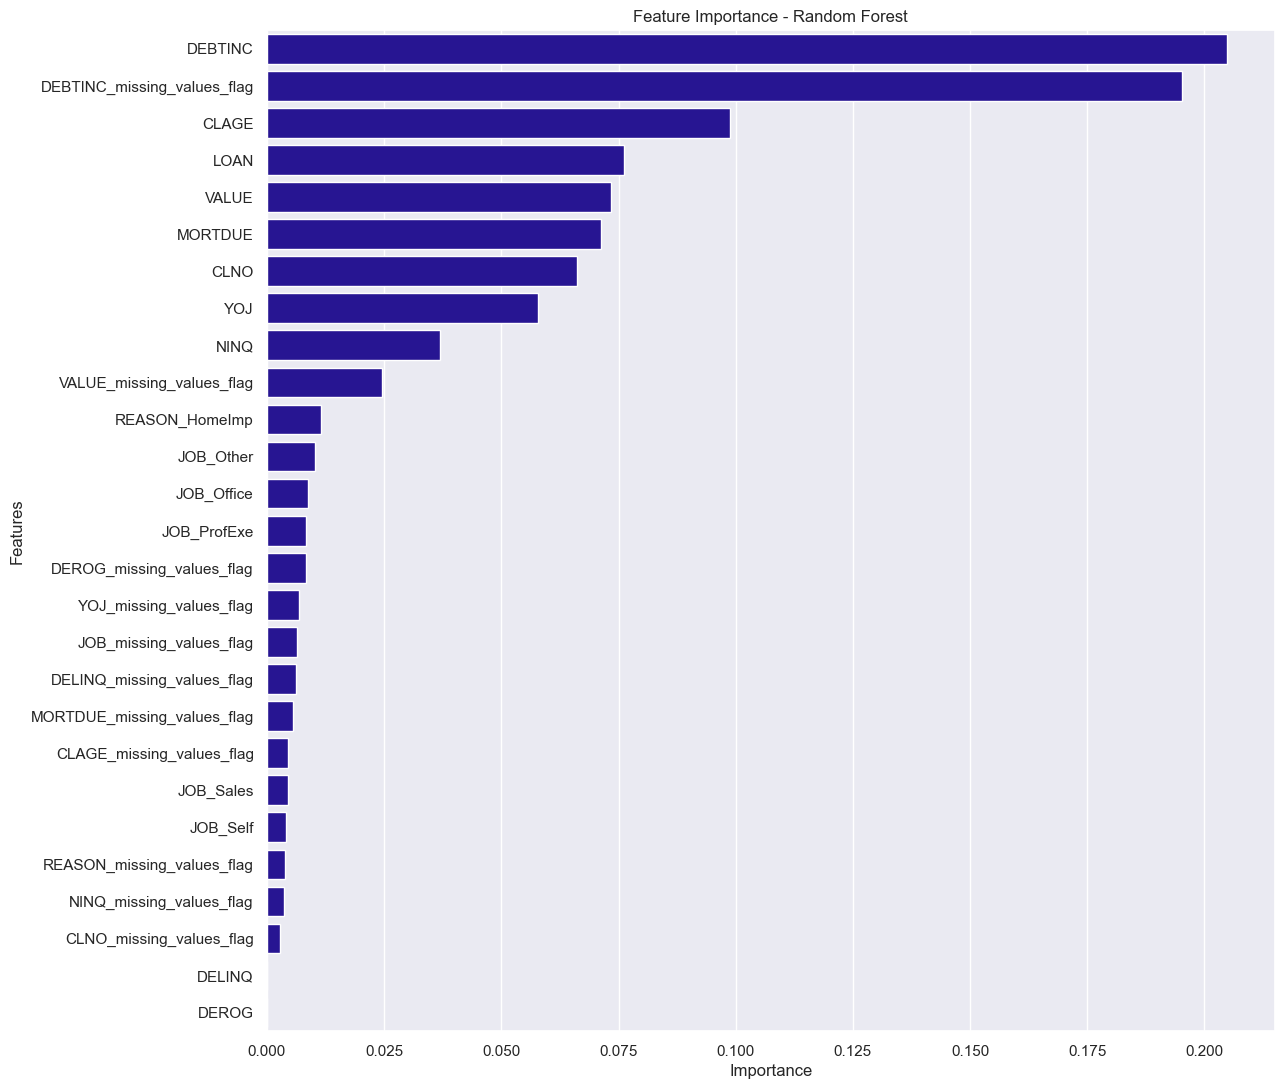

In [132]:
# Importance of features in the tree building
importances = rf_estimator.feature_importances_
columns = X.columns

importance_df = (
    pd.DataFrame(importances, index=columns, columns=['Importance'])
    .sort_values(by='Importance', ascending=False)
)

plt.figure(figsize=(13, 13))
sns.barplot(x="Importance", y=importance_df.index, data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


### **Tuning the Random Forest**

#### **Warning:** This will take a long time.

In [133]:
# Choosing the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Running the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)


#fitting the GridSearch on train dataset
grid_obj = grid_obj.fit(x_train, y_train)


# Setting the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fitting the best algorithm to the data. 
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.9, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



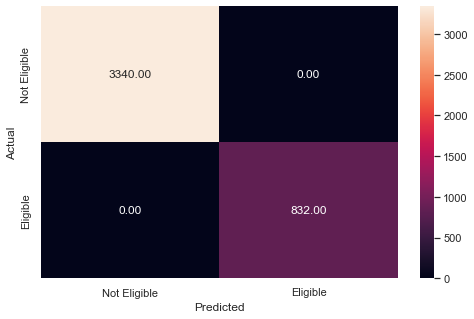

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1431
           1       0.76      0.64      0.70       357

    accuracy                           0.89      1788
   macro avg       0.84      0.80      0.81      1788
weighted avg       0.88      0.89      0.88      1788



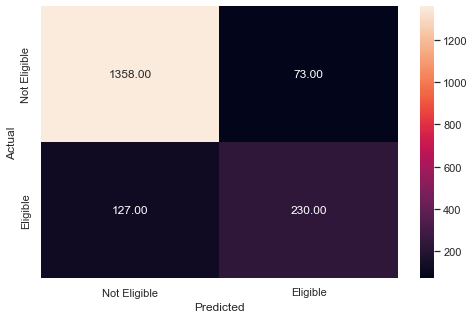

In [ ]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Insights:**

- The tuned model is also **overfitting the training dataset** but it shows a good performance on the test dataset.
- The **recall** for class 1 has improved to .68 in comparison to non-tuned random forest model (.63) with a small decrease in precision on the test dataset.
- The **recall in this model is still not better** than the tuned decision tree (.68 vs .74), but **precision is much better (.82 vs .62).**

### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Making the list of all the model names 

#models = [lg, dt, dtree_estimator, rf_estimator, rf_estimator_tuned]
models = [rf_estimator_tuned, rf_estimator, dtree_estimator, dt]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    
     # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

   

In [ ]:
# Mentioning the Model names in the list. 
comparison_frame = pd.DataFrame({'Model':['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Tuned Random Forest,1.000000,0.888143,1.000000,0.644258,1.000000,0.759076
1,Random Forest,1.000000,0.890380,1.000000,0.641457,1.000000,0.771044
2,Tuned Decision Tree,0.860978,0.854027,0.796875,0.759104,0.617318,0.607623
3,Decision Tree,1.000000,0.855145,1.000000,0.568627,1.000000,0.659091


**Insights:**

- Models with the **higher test accuracy are the Random Forest and Tuned Random Forest ~.90**
- All models **overfit** the training data with the exception of the Tuned Decision Tree.
- The highest **recall (~0.74) belongs to the Tuned Decision Tree**. The others are similars.
- **Precision in Random Forest models** are similar and high (+.82). Is also higher than Decision Tree models.
- **Precision in the Decision Tree** is higher than in the Tuned Decision Tree (~.73 vs ~.62).